In [5]:
import pandas as pd

In [6]:
df=pd.read_csv("heart (1).csv")

In [7]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# Missing value

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# duplicate value

In [9]:
df_dup=df.duplicated().any()

In [10]:
df_dup

True

In [11]:
df=df.drop_duplicates()

In [12]:
df_dup=df.duplicated().any()

In [13]:
df_dup

False

# data processing

In [14]:
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [15]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [16]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# encoding categorical data

In [17]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [18]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

In [19]:
cate_val.remove('sex')
cate_val.remove('target')
df=pd.get_dummies(df,columns=cate_val,drop_first=True)

In [20]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# feature scaling

In [21]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
st=StandardScaler()
df[cont_val]=st.fit_transform(df[cont_val])

In [24]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


# Splitting The Dataset Into Training Set And Test Set

In [25]:
x=df.drop('target',axis=1)

In [26]:
y=df['target']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

# Logistic Regression

In [30]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
log=LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [33]:
y_pred1=log.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

# SVC

In [36]:
from sklearn import svm

In [37]:
svm=svm.SVC()

In [38]:
svm.fit(x_train,y_train)

SVC()

In [39]:
y_pred2=svm.predict(x_test)

In [40]:
accuracy_score(y_test,y_pred2)

0.8032786885245902

# KNeighbors Classifier 

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn=KNeighborsClassifier()

In [43]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
y_pred3=knn.predict(x_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [45]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [46]:
score=[]

for k in range(1,40):
    knn=KNeighborsClassifier()
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred))

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [47]:
score

[0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [48]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
accuracy_score(y_test,y_pred)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8032786885245902

# Non-Linear ML Algorithm 

In [49]:
df=pd.read_csv('heart (1).csv')

In [50]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [51]:
df=df.drop_duplicates()

In [52]:
df.shape

(302, 14)

In [53]:
x=df.drop('target',axis=1)
y=df['target']

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dt= DecisionTreeClassifier()

In [57]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
y_pred4=dt.predict(x_test)

In [59]:
accuracy_score(y_test,y_pred4)

0.7704918032786885

# Random Forest Classifier 

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rf=RandomForestClassifier()

In [62]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
y_pred5=dt.predict(x_test)

In [64]:
accuracy_score(y_test,y_pred5)

0.7704918032786885

# Gradient Boosting Classifier

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
gbc=GradientBoostingClassifier()

In [67]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [68]:
y_pred6=dt.predict(x_test)

In [69]:
accuracy_score(y_test,y_pred6)

0.7704918032786885

In [70]:
final_df=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],'ACC':[accuracy_score(y_test,y_pred1),
                                                                         accuracy_score(y_test,y_pred2),
                                                                         accuracy_score(y_test,y_pred3),
                                                                         accuracy_score(y_test,y_pred4),
                                                                         accuracy_score(y_test,y_pred5),
                                                                         accuracy_score(y_test,y_pred6)]})

In [71]:
final_df

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.770492
4,RF,0.770492
5,GB,0.770492


In [72]:
import seaborn as sns

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

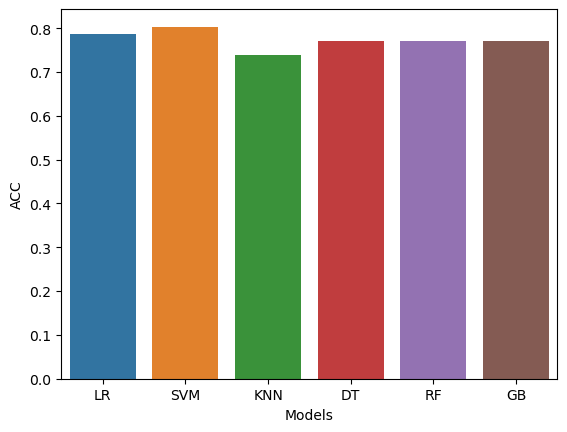

In [73]:
sns.barplot(final_df['Models'],final_df['ACC'])

In [74]:
x=df.drop('target',axis=1)
y=df['target']

In [75]:
x.shape

(302, 13)

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
rf=RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

# Prediction On New Data 

In [78]:
import pandas as pd

In [79]:
new_df=pd.DataFrame({'age':52,
                    'sex':1,
                    'cp':0,
                     'trestbps':125,
                     'chol':212,
                     'fbs':0,
                     'restecg':1,
                     'thalach':168,
                     'exang':0,
                     'oldpeak':1.0,
                     'slope':2,
                     'ca':2,
                     'thal':3,},index=[0])

In [80]:
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [81]:
rf.predict (new_df)

array([0], dtype=int64)

# Save Model Using Joblib

In [82]:
import joblib

In [83]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [84]:
model=joblib.load('model_joblib_heart')

In [85]:
model.predict(new_df)

array([0], dtype=int64)

# GUI

In [3]:
from tkinter import*
import joblib

In [2]:
def show_entry_field():
    p1=int(e1.get())
    p2=int(e2.get())
    p3=int(e3.get())
    p4=int(e4.get())
    p5=int(e5.get())
    p6=int(e6.get())
    p7=int(e7.get())
    p8=int(e8.get())
    p9=int(e9.get())
    p10=float(e10.get())
    p11=int(e11.get())
    p12=int(e12.get())
    p13=int(e13.get())
    model=joblib.load('model_joblib_heart')
    resuit=model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    result=int(result)
    if result==0:
        Label(master,text="No Heart Diseases").grid(row=31)
    else:
        Label(master,text="Possibility Of Heart Diseases").grid(row=31)
        
    master=Tk()
    master.title("Heart Dieseases Prediction System")
    
    lable=Lable(master, text="Heart Dieseases Prediction System",bg="black",fg="white").\
                                                      grid(row=0,columnspan=2)
    Lable(master, text="Enter Your Age").grid(row=1)
    Lable(master,text="Male Or Female[1/0]").grid(row=2)
    Lable(master,text="Enter Value of cp").grid(row=3)
    Lable(master,text="Enter Value Of trestbps").grid(row=4)
    Lable(master,text="Enter Value of chol ").grid(row=5)
    Lable(master,text="Enter Value of fbs").grid(row=6)
    Lable(master,text="Enter Value of restecg ").grid(row=7)
    Lable(master,text="Enter  Value of thalach ").grid(row=8)
    Lable(master,text="Enter Value of exang").grid(row=9)
    Lable(master,text="Enter Value of oldpeak").grid(row=10)
    Lable(master,text="Enter Value of slope ").grid(row=11)
    Lable(master,text="Enter Value of ca").grid(row=12)
    Lable(master,text="Enter Value of thal ").grid(row=13)
    
    e1=Entry(master)
    e2=Entry(master)
    e3=Entry(master)
    e4=Entry(master)
    e5=Entry(master)
    e6=Entry(master)
    e7=Entry(master)
    e8=Entry(master)
    e9=Entry(master)
    e10=Entry(master)
    e11=Entry(master)
    e12=Entry(master)
    e13=Entry(master)
    
    e1.grid(row=1,column=1)
    e2.grid(row=2,column=1)
    e3.grid(row=3,column=1)
    e4.grid(row=4,column=1)
    e5.grid(row=5,column=1)
    e6.grid(row=6,column=1)
    e7.grid(row=7,column=1)
    e8.grid(row=8,column=1)
    e9.grid(row=9,column=1)
    e10.grid(row=10,column=1)
    e11.grid(row=11,column=1)
    e12.grid(row=12,column=1)
    e13.grid(row=13,column=1)

    Button(master,text='predict',command=show_entry_fields).grid()
    mainloop()
    
    
    